# Data Cleaning and Splitting

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

In [2]:
raw_data = pd.read_csv("600K US Housing Properties.csv")
raw_data.head(2)

C:\Users\supre\AppData\Local\Temp\ipykernel_9644\704100432.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv("600K US Housing Properties.csv")


,property_url,property_id,address,street_name,apartment,city,state,latitude,longitude,postcode,...,property_type,property_status,year_build,total_num_units,listing_age,RunDate,agency_name,agent_name,agent_phone,is_owned_by_zillow
0,https://www.zillow.com/homedetails/3-Plat-83-1...,2064212272,"3 Plat #83-10, Wrangell, AK 99929",Plat #83-10,NaN,Wrangell,AK,NaN,NaN,99929,...,LOT,FOR_SALE,NaN,NaN,-1,2022-04-24 07:34:15,Anchor Properties,NaN,NaN,0
1,https://www.zillow.com/homedetails/117-3rd-St-...,249518113,"117 3rd St, Wrangell, AK 99929",3rd St,NaN,Wrangell,AK,56.474518,-132.386,99929,...,SINGLE_FAMILY,FOR_SALE,NaN,NaN,-1,2022-04-24 07:34:15,NaN,NaN,NaN,0


In [3]:
# Selecting usefull Columns and Dropping others
raw_data = raw_data[['property_id','address','street_name','city','state','latitude','longitude','postcode'
            ,'price','bedroom_number','bathroom_number','price_per_unit','living_space','land_space','land_space_unit'
            ,'property_type']]

In [4]:
raw_data

,property_id,address,street_name,city,state,latitude,longitude,postcode,price,bedroom_number,bathroom_number,price_per_unit,living_space,land_space,land_space_unit,property_type
0,2064212272,"3 Plat #83-10, Wrangell, AK 99929",Plat #83-10,Wrangell,AK,NaN,NaN,99929,135000.0,NaN,NaN,NaN,NaN,3.8860,acres,LOT
1,249518113,"117 3rd St, Wrangell, AK 99929",3rd St,Wrangell,AK,56.474518,-132.386000,99929,589500.0,3.0,3.0,237.0,2478.0,7492.0000,sqft,SINGLE_FAMILY
2,2077729913,"LOT 2A Front St, Wrangell, AK 99929",LOT 2A Front St,Wrangell,AK,56.471638,-132.386860,99929,99999.0,NaN,0.0,NaN,NaN,7222.0000,sqft,LOT
3,2067488502,"LOT A Plat #2009-6, Wrangell, AK 99929",LOT A Plat #2009-6,Wrangell,AK,NaN,NaN,99929,495000.0,3.0,1.0,330.0,1500.0,61.9705,acres,SINGLE_FAMILY
4,249518139,"335 Cassiar St, Wrangell, AK 99929",Cassiar St,Wrangell,AK,56.475697,-132.389050,99929,405000.0,5.0,3.0,194.0,2080.0,10436.0000,sqft,SINGLE_FAMILY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,4303608,"6317 Virginia Ln, Matteson, IL 60443",Virginia Ln,Matteson,IL,41.523070,-87.769340,60443,350000.0,4.0,3.0,134.0,2600.0,10375.9920,sqft,SINGLE_FAMILY
599996,2078144422,"LOT 16 Ray Ave, West Chicago, IL 60185",LOT 16 Ray Ave,West Chicago,IL,NaN,NaN,60185,29900.0,NaN,NaN,NaN,NaN,0.2600,acres,LOT
599997,4604875,"12S135 Lemont Rd, Lemont, IL 60439",135 Lemont Rd,Lemont,IL,41.697723,-88.003746,60439,859000.0,3.0,3.0,254.0,3373.0,4.8204,acres,SINGLE_FAMILY
599998,65578365,"4701 Abbey Ln, Matteson, IL 60443",Abbey Ln,Matteson,IL,41.519527,-87.730644,60443,465000.0,5.0,4.0,140.0,3301.0,10193.0400,sqft,SINGLE_FAMILY


In [5]:
raw_data.isnull().sum()

property_id             0
address                 0
street_name           131
city                    1
state                   1
latitude            70878
longitude           70878
postcode               30
price                   0
bedroom_number     156155
bathroom_number    128267
price_per_unit     164635
living_space       152153
land_space          84881
land_space_unit     84881
property_type           0
dtype: int64

In [6]:
raw_data.dropna(subset=['price_per_unit'], inplace=True)

In [7]:
raw_data.dropna(subset=['land_space'], inplace=True)

In [8]:
raw_data.dropna(subset=['bedroom_number'], inplace=True)

In [9]:
raw_data.dropna(subset=['bathroom_number'], inplace=True)

In [10]:
raw_data.dropna(subset=['latitude'], inplace=True)

In [11]:
raw_data.dropna(subset=['longitude'], inplace=True)

In [12]:
raw_data.isnull().sum()

property_id        0
address            0
street_name        2
city               1
state              0
latitude           0
longitude          0
postcode           3
price              0
bedroom_number     0
bathroom_number    0
price_per_unit     0
living_space       0
land_space         0
land_space_unit    0
property_type      0
dtype: int64

In [13]:
raw_data.dropna(subset=['street_name'], inplace=True)

In [14]:
raw_data.dropna(subset=['city'], inplace=True)

In [15]:
raw_data.dropna(subset=['postcode'], inplace=True)

In [16]:
raw_data.isnull().sum()

property_id        0
address            0
street_name        0
city               0
state              0
latitude           0
longitude          0
postcode           0
price              0
bedroom_number     0
bathroom_number    0
price_per_unit     0
living_space       0
land_space         0
land_space_unit    0
property_type      0
dtype: int64

In [17]:
raw_data.dtypes

property_id          int64
address             object
street_name         object
city                object
state               object
latitude           float64
longitude          float64
postcode            object
price              float64
bedroom_number     float64
bathroom_number    float64
price_per_unit     float64
living_space       float64
land_space         float64
land_space_unit     object
property_type       object
dtype: object

In [18]:
# Convert 'acres' to square feet in the 'land_space' column
raw_data.loc[raw_data['land_space_unit'] == 'acres', 'land_space'] *= 43560.0

In [19]:
# Update 'land_space_unit' to 'sqft' where 'acres' was converted
raw_data.loc[raw_data['land_space_unit'] == 'acres', 'land_space_unit'] = 'sqft'

In [20]:
# Dropping rows where 'state' equal to 'BC'
raw_data = raw_data[raw_data['state'] != 'BC']

In [21]:
raw_data = raw_data[raw_data['bedroom_number'] <= 5]

In [22]:
# Dropping rows where 'bathroom_number' equal to '0' and more than 10
raw_data = raw_data[(raw_data['bathroom_number'] <= 8) & (raw_data['bathroom_number'] >= 1)]

In [23]:
raw_data = raw_data[(raw_data['living_space'] <= 10000) & (raw_data['living_space'] >= 400)]

In [24]:
# Convert datatype object to string for 'postcode'
raw_data['postcode'] = raw_data['postcode'].astype(str)

In [25]:
raw_data.shape

(318646, 16)

In [26]:
# All numeric columns for which we want to identify outliers
numeric_columns = ['price', 'bedroom_number', 'bathroom_number', 'living_space', 'land_space']

# Identify and count outliers for each numeric column
for column_name in numeric_columns:
    Q1 = raw_data[column_name].quantile(0.25)
    Q3 = raw_data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = raw_data[(raw_data[column_name] < lower_bound) | (raw_data[column_name] > upper_bound)]

    num_outliers = outliers.shape[0]
    print(f"Number of outliers in {column_name}: {num_outliers}")


Number of outliers in price: 24270
Number of outliers in bedroom_number: 6644
Number of outliers in bathroom_number: 13369
Number of outliers in living_space: 12456
Number of outliers in land_space: 55551


In [27]:
# Dropping all rows with Outliers 
raw_data = raw_data.drop(outliers.index)

# Reset the index
raw_data = raw_data.reset_index(drop=True)

In [28]:
raw_data.shape

(263095, 16)

In [29]:
raw_data.to_csv("clean_data_outlier.csv")

In [30]:
# Group the data by 'state' and count the unique property IDs
state_counts = raw_data.groupby('state')['property_id'].nunique()
state_counts

state
AK     1118
AR     4179
AZ    18167
CA    51735
CO    12041
CT        1
HI     1949
IA      177
ID     5086
IL    17256
KS     6646
LA     7224
MO    13931
NE     4889
NM     3807
NV     8905
OK     8569
OR     9159
TX    65780
UT     6256
WA    15255
WY      965
Name: property_id, dtype: int64

In [31]:
# Select the top 5 states with the highest number of unique property IDs
top_states = state_counts.sort_values(ascending=False).head(5).index
top_states

Index(['TX', 'CA', 'AZ', 'IL', 'WA'], dtype='object', name='state')

In [32]:
# Shortlist the data for the top 5 states
top_states_data = raw_data[raw_data['state'].isin(top_states)]

# Reset the index
top_states_data = top_states_data.reset_index(drop=True)

# Display the shortlisted data
top_states_data.head(50)

,property_id,address,street_name,city,state,latitude,longitude,postcode,price,bedroom_number,bathroom_number,price_per_unit,living_space,land_space,land_space_unit,property_type
0,318990176,"649 Hargraves Avenue NE, Royal City, WA 99357",Hargraves Avenue NE,Royal City,WA,46.906307,-119.622284,99357,399900.0,4.0,3.0,229.0,1742.0,17193.132,sqft,SINGLE_FAMILY
1,204997510,"15822 S Clear View Loop, Kennewick, WA 99338",S Clear View Loop,Kennewick,WA,46.190080,-119.318460,99338,799000.0,4.0,3.0,306.0,2611.0,26893.944,sqft,SINGLE_FAMILY
2,2064111934,"3602 3602/3600 W 15th Ave, Kennewick, WA 99338",3602/3600 W 15th Ave,Kennewick,WA,46.194970,-119.192780,99338,389000.0,4.0,2.0,167.0,2328.0,15681.600,sqft,MULTI_FAMILY
3,331355531,"6087 W 34th Ave, Kennewick, WA 99338",W 34th Ave,Kennewick,WA,46.178677,-119.204510,99338,525000.0,4.0,3.0,220.0,2380.0,9583.000,sqft,SINGLE_FAMILY
4,85939771,"1506 S Olson St, Kennewick, WA 99338",S Olson St,Kennewick,WA,46.194546,-119.172320,99338,350000.0,3.0,2.0,228.0,1529.0,12632.400,sqft,SINGLE_FAMILY
5,204997385,"13308 S Grandview Ln, Kennewick, WA 99338",S Grandview Ln,Kennewick,WA,46.192604,-119.326720,99338,799900.0,3.0,3.0,294.0,2712.0,23857.812,sqft,SINGLE_FAMILY
6,126582680,"17640 S Fairview Loop, Kennewick, WA 99338",S Fairview Loop,Kennewick,WA,46.188590,-119.312620,99338,639900.0,4.0,3.0,277.0,2308.0,24110.460,sqft,SINGLE_FAMILY
7,85963207,"5907 W 14th Ave, Kennewick, WA 99338",W 14th Ave,Kennewick,WA,46.196050,-119.200966,99338,440000.0,3.0,2.0,268.0,1641.0,10454.400,sqft,SINGLE_FAMILY
8,85947076,"294 Rachel Rd, Kennewick, WA 99338",Rachel Rd,Kennewick,WA,46.209940,-119.283450,99338,629900.0,4.0,3.0,265.0,2373.0,21780.000,sqft,SINGLE_FAMILY
9,251483237,"3787 S Sherman St, Kennewick, WA 99338",S Sherman St,Kennewick,WA,46.175232,-119.211670,99338,587900.0,3.0,2.0,252.0,2330.0,9147.600,sqft,SINGLE_FAMILY


In [33]:
top_states_data.to_csv("clean_data_outlier1.csv")

In [34]:
texas_data = state_counts.sort_values(ascending=False).head(1).index

In [35]:
texas_state_data = raw_data[raw_data['state'].isin(texas_data)]

# Reset the index
texas_state_data = texas_state_data.reset_index(drop=True)

# Display the shortlisted data
texas_state_data.head()

,property_id,address,street_name,city,state,latitude,longitude,postcode,price,bedroom_number,bathroom_number,price_per_unit,living_space,land_space,land_space_unit,property_type
0,27399441,"1116 Saint Johns Dr, El Paso, TX 79903",Saint Johns Dr,El Paso,TX,31.786737,-106.42802,79903,239500.0,5.0,3.0,141.0,1692.0,6969.6,sqft,SINGLE_FAMILY
1,27498318,"1101 Apache St, El Paso, TX 79925",Apache St,El Paso,TX,31.784021,-106.40445,79925,165000.0,4.0,2.0,100.0,1650.0,12632.4,sqft,SINGLE_FAMILY
2,27497333,"452 Val Verde St, El Paso, TX 79905",Val Verde St,El Paso,TX,31.761911,-106.43233,79905,118000.0,4.0,1.0,61.0,1918.0,11325.6,sqft,SINGLE_FAMILY
3,27416021,"4600 Cumberland Cir, El Paso, TX 79903",Cumberland Cir,El Paso,TX,31.790165,-106.43596,79903,414700.0,4.0,3.0,132.0,3119.0,15246.0,sqft,SINGLE_FAMILY
4,27397349,"6028 Aztec Rd, El Paso, TX 79925",Aztec Rd,El Paso,TX,31.785316,-106.41115,79925,174950.0,4.0,2.0,97.0,1800.0,6098.4,sqft,SINGLE_FAMILY


In [36]:
texas_state_data.shape

(65780, 16)

In [37]:
texas_state_data.to_csv("texas_state_data.csv")

In [38]:
arizona_state_data = top_states_data[top_states_data['state'] == 'AZ']

In [39]:
# Reset the index
arizona_state_data = arizona_state_data.reset_index(drop=True)

# Display the shortlisted data
arizona_state_data.head()

,property_id,address,street_name,city,state,latitude,longitude,postcode,price,bedroom_number,bathroom_number,price_per_unit,living_space,land_space,land_space_unit,property_type
0,8352055,"854 Citrus St, Bullhead City, AZ 86442",Citrus St,Bullhead City,AZ,35.114260,-114.618385,86442,54900.0,2.0,1.0,79.0,688.0,5000.0,sqft,MANUFACTURED
1,64954116,"1825 E Shore Villas Dr UNIT 33, Bullhead City,...",E Shore Villas Dr UNIT 33,Bullhead City,AZ,35.122700,-114.589750,86442,379900.0,3.0,3.0,230.0,1649.0,3640.0,sqft,SINGLE_FAMILY
2,71677227,"790 Stahlman Dr, Bullhead City, AZ 86442",Stahlman Dr,Bullhead City,AZ,35.118100,-114.620620,86442,549900.0,3.0,4.0,169.0,3250.0,10225.0,sqft,SINGLE_FAMILY
3,8351548,"905 Citrus St, Bullhead City, AZ 86442",Citrus St,Bullhead City,AZ,35.114693,-114.616250,86442,169900.0,3.0,2.0,146.0,1157.0,5000.0,sqft,MANUFACTURED
4,8352036,"787 Citrus St, Bullhead City, AZ 86442",Citrus St,Bullhead City,AZ,35.114700,-114.621220,86442,169900.0,2.0,2.0,117.0,1440.0,4791.6,sqft,MANUFACTURED


In [40]:
arizona_state_data.shape

(18167, 16)

In [42]:
arizona_state_data.to_csv("arizona_state_data.csv")

In [43]:
ca_state_data = top_states_data[top_states_data['state'] == 'CA']
ca_state_data.shape

(51735, 16)

In [44]:
ca_state_data.to_csv('ca_state_data.csv')

# Price Prediction -- State==Arizona 

In [45]:
# Selecting features (X) and target variable (y)
features = ['bedroom_number', 'bathroom_number', 'living_space','city']
target = 'price'

X = arizona_state_data[features]
y = arizona_state_data[target]

X = pd.get_dummies(X, columns=['city'], drop_first=True)

In [46]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Create a RandomForestRegressor
model = RandomForestRegressor(n_estimators=200, random_state=42)
# Fit the model to the training data
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

### Here we enter Client's requirement to give a Predicted price based on 4 Features 
####                       1. #Bedrooms 2. #Bathrooms 3. Living Space 4. City of his choice

In [48]:
# Using the model to predict 'price' by Client's input
client_data = pd.DataFrame({'bedroom_number': [4], 'bathroom_number': [3], 'living_space': [2500], 'city': ['Chino Valley']})

In [49]:
# One-hot encode the 'city' column in the new data
client_data_encoded = pd.get_dummies(client_data, columns=['city'], drop_first=True)

# Columns in the new data match the columns used during training
missing_columns = set(X_train.columns) - set(client_data_encoded.columns)
for column in missing_columns:
    client_data_encoded[column] = 0  # Add missing columns with value 0

C:\Users\supre\AppData\Local\Temp\ipykernel_9644\4278839588.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  client_data_encoded[column] = 0  # Add missing columns with value 0
C:\Users\supre\AppData\Local\Temp\ipykernel_9644\4278839588.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  client_data_encoded[column] = 0  # Add missing columns with value 0
C:\Users\supre\AppData\Local\Temp\ipykernel_9644\4278839588.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` ma

In [50]:
# Reorder columns to match the training data order
client_data_encoded = client_data_encoded[X_train.columns]

In [51]:
# Predict the price using the model from Encoded data c/o feature 'city' 002
predicted_price = model.predict(client_data_encoded)
print(f'Predicted Price: {predicted_price}')

Predicted Price: [516541.8475]


### Number of Bathrooms plays significant role in Adding up the value of the house

In [56]:
# Evaluate the model on the training data
predicted_train = model.predict(X_train)

# R-squared (R2) score on the train data
r2_train = r2_score(y_train, predicted_train)
print(f'R-squared (R2) Score on Training Data: {r2_train}')

# Evaluate the model on the test data
predicted_test = model.predict(X_test)

# R-squared (R2) score on the test data
r2_test = r2_score(y_test, predicted_test)
print(f'R-squared (R2) Score on Testing Data: {r2_test}')

R-squared (R2) Score on Training Data: 0.962116364696777
R-squared (R2) Score on Testing Data: 0.7620556307597843


In [54]:
# Evaluate the model on the training data
predicted_train = model.predict(X_train)

# Mean Absolute Error (MAE) on the training data
mae_train = mean_absolute_error(y_train, predicted_train)
print(f'Mean Absolute Error on Training Data: {mae_train}')

# Evaluate the model on the test data
predicted_test = model.predict(X_test)

# Mean Absolute Error (MAE) on the test data
mae_test = mean_absolute_error(y_test, predicted_test)
print(f'Mean Absolute Error on Testing Data: {mae_test}')

Mean Absolute Error on Training Data: 40150.864581059905


### Geeting the mean of the lat and lon for sharing with recomendation model which uses this info to recomend nearby properties

In [57]:
# Group by 'city' and calculate average latitude and longitude
average_coordinates = arizona_state_data.groupby('city').agg({'latitude': 'mean', 'longitude': 'mean'}).reset_index()

# Display the result
average_coordinates.head()

,city,latitude,longitude
0,Ages Brookside,33.085636,-112.005844
1,Ajo,32.378280,-112.868490
2,Alpine,33.838182,-109.143874
3,Amado,31.730204,-111.063832
4,Anthem,33.859557,-112.122203


In [58]:
client_city_lat_lon = average_coordinates[average_coordinates['city'] == 'Chino Valley']
client_city_lat_lon

,city,latitude,longitude
24,Chino Valley,34.753203,-112.438942


## Linear Regression Ploting

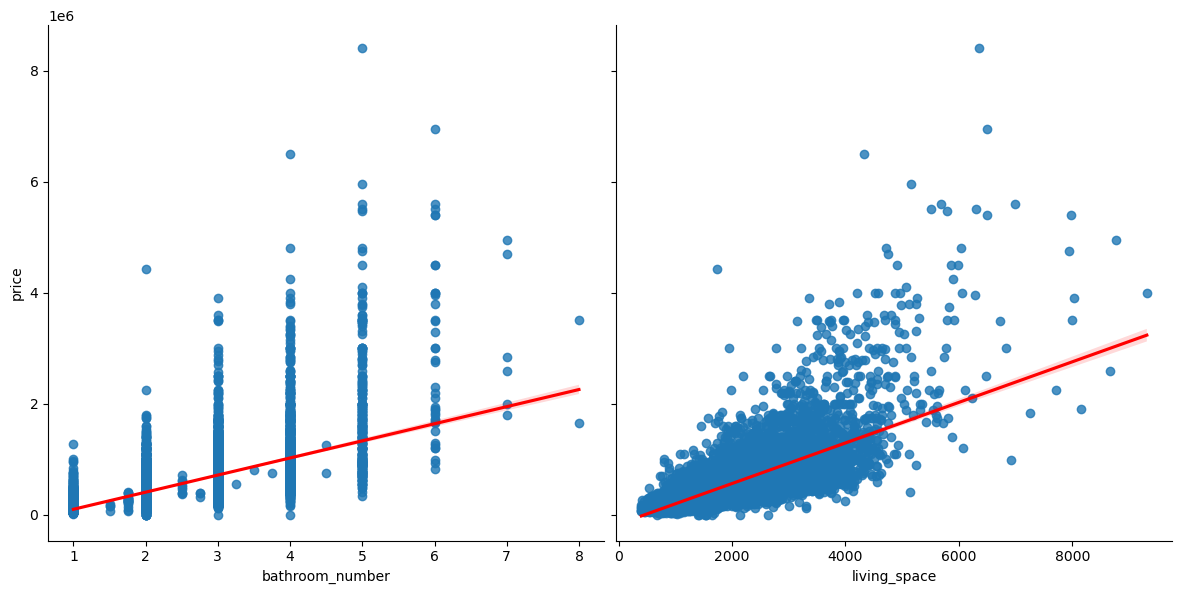

Coefficients:
bathroom_number: 60836.14706558022
living_space: 317.9105964419876


In [67]:
# Extract relevant columns
features = ['bathroom_number', 'living_space']
target = 'price'

# Creating a pair plot to visualize relationships with regression line
sns.pairplot(arizona_state_data, x_vars=features, y_vars=target, kind='reg', height=6, plot_kws={'line_kws':{'color':'red'}})
plt.show()

# Create a linear regression model
model = LinearRegression()

# Extract features and target variable
X = arizona_state_data[features]
y = arizona_state_data[target]

# Fit the model
model.fit(X, y)

# Display coefficients
print("Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef}")

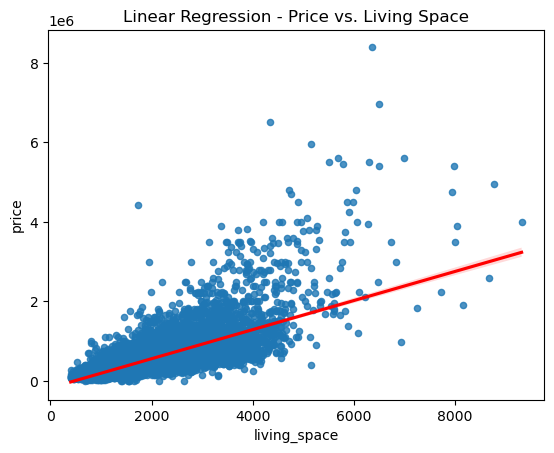

In [63]:
# Select relevant features
features = ['living_space', 'price']

# Drop rows with missing values in selected features
data_for_regression = arizona_state_data[features].dropna()

# Plot the linear regression line
sns.regplot(x='living_space', y='price', data=data_for_regression, scatter_kws={'s': 20}, line_kws={'color': 'red'})
plt.title('Linear Regression - Price vs. Living Space')
plt.show()

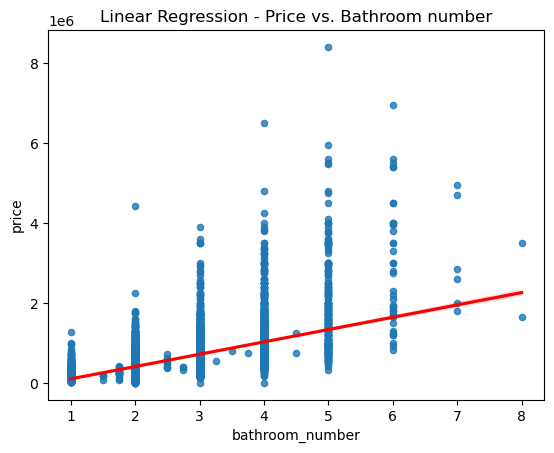

In [64]:
# Select relevant features
features = ['bathroom_number', 'price']

# Drop rows with missing values in selected features
data_for_regression = arizona_state_data[features].dropna()

# Plot the linear regression line
sns.regplot(x='bathroom_number', y='price', data=data_for_regression, scatter_kws={'s': 20}, line_kws={'color': 'red'})
plt.title('Linear Regression - Price vs. Bathroom number')
plt.show()

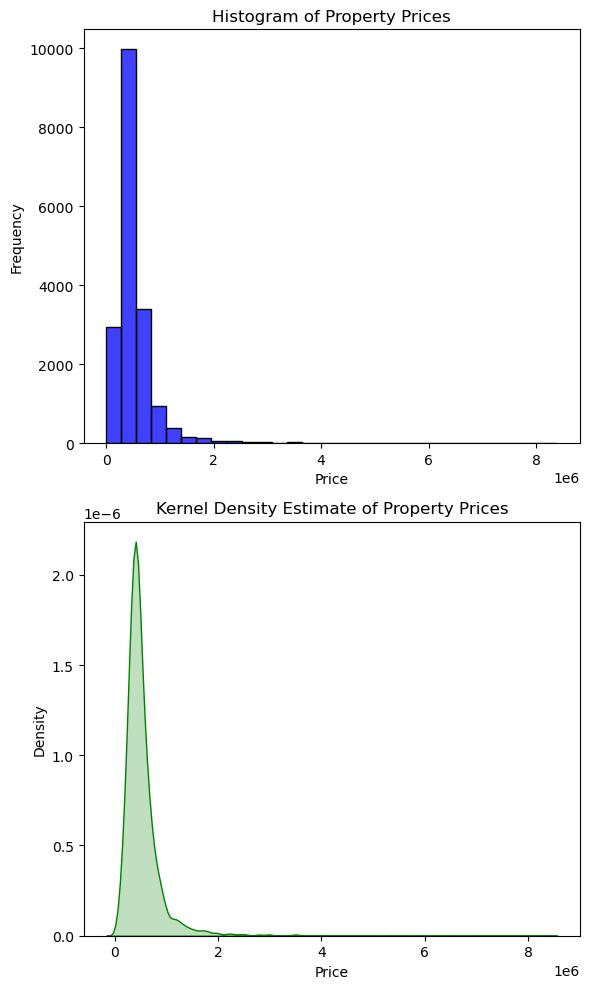

In [65]:
property_prices = arizona_state_data['price']

# Set up a grid of subplots
fig, axes = plt.subplots(2, 1, figsize=(6, 10))

# Plot a histogram with additional details
sns.histplot(property_prices, bins=30, kde=False, color='blue', ax=axes[0])
axes[0].set_title('Histogram of Property Prices')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

# Plot a kernel density estimate (KDE) with additional details
sns.kdeplot(property_prices, color='green', fill=True, ax=axes[1])
axes[1].set_title('Kernel Density Estimate of Property Prices')
axes[1].set_xlabel('Price')
axes[1].set_ylabel('Density')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

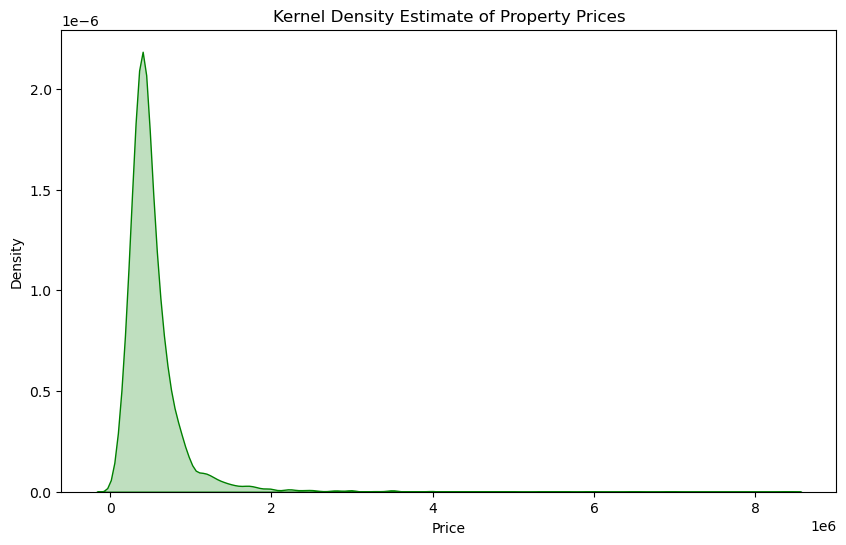

In [66]:
# Plot a kernel density estimate (KDE)
plt.figure(figsize=(10, 6))
sns.kdeplot(property_prices, color='green', fill=True)
plt.title('Kernel Density Estimate of Property Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()